### Part 1 - Set Up

In [1]:
# relevant packages & modules
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import json
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt


In [2]:
# relevant websites
rest_reviews_dynamic = 'https://www.tripadvisor.in/'

# Dynamic Scraping
The user will input the restaurant name

In [3]:
# Getting Restaurant name
print("Please type the Restaurant name")
rest_name = input()

Please type the Restaurant name
The Royal Afghan


In [4]:
print(rest_name)

The Royal Afghan


In [5]:
driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')
driver.get(rest_reviews_dynamic)
driver.maximize_window()
time.sleep(10)

search = driver.find_elements_by_xpath("//form//input[@type='search']")

#click
search[1].click()
time.sleep(1)
search[1].send_keys(rest_name)


# Logic to select our required Restaurant
# For the time being we will always choose the first name in the list that pops and will assume the Restuarant is in Bangalore
list_rest_names = driver.find_elements_by_xpath("//a[@class='bPaPP w z _S _F Wc Wh Q B- _G']")

time.sleep(3)
list_rest_names[0].click()

time.sleep(5)

# Logic to scrap reviews

reviews = driver.find_elements_by_xpath('//p[@class="partial_entry"]')
print(len(reviews))
for r in reviews:
   print(r.text) 

<ipython-input-5-61721080edae>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:\webdrivers\chromedriver.exe')
<ipython-input-5-61721080edae>:6: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  search = driver.find_elements_by_xpath("//form//input[@type='search']")
<ipython-input-5-61721080edae>:16: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  list_rest_names = driver.find_elements_by_xpath("//a[@class='bPaPP w z _S _F Wc Wh Q B- _G']")
<ipython-input-5-61721080edae>:25: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  reviews = driver.find_elements_by_xpath('//p[@class="partial_entry"]')


17
So we came here on my birthday. We had a such great time. We came with 9 month old and they were so kind of accommodate everything for us. The food was delicious and the service was awesome. Ankit was a great help. We would...More
We thoroughly enjoyed the food. the kababs and naan were delicious. we were presently surprised when they gave cake to my daughter for her birthday. it was a very nice experience. very courteous staff and hygienic environment! Naveen was very courteous and helpful. Rajiv
Fantastic experience @ the royal Afghan Bangalore…excellent food, wonderful hospitality. A treat worth remembering.
Best place to have authentic frontier food. Clean place, courteous staff made us feel comfortable particularly in this trying timesMore
Dear Guest, Thank you for taking the time out to share your feedback with us. Royal Afghan is the popular poolside barbecue restaurant that serves a unique cuisine from the rugged Indian North-West frontier, with the rustic charm of the tradi

In [6]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Anuj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
sentiments = [sia.polarity_scores(r.text)['compound'] for r in reviews]
sentiments

[0.9623,
 0.9713,
 0.8979,
 0.926,
 0.8957,
 0.946,
 0.8402,
 0.9671,
 0.9392,
 0.9622,
 0.8957,
 0.7717,
 0.8402,
 0.9259,
 0.8402,
 0.8065,
 0.8957]

Text(0.5, 1.0, 'The Royal Afghan Reviews')

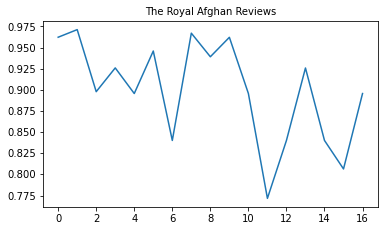

In [8]:
# Plotting the sentiments
title = rest_name + " " + "Reviews"
a = plt.subplot2grid((7, 4), (1, 0), rowspan = 6, colspan = 4)

a.clear() 
a.plot(sentiments)

a.set_title(title, fontsize = 10)   